In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

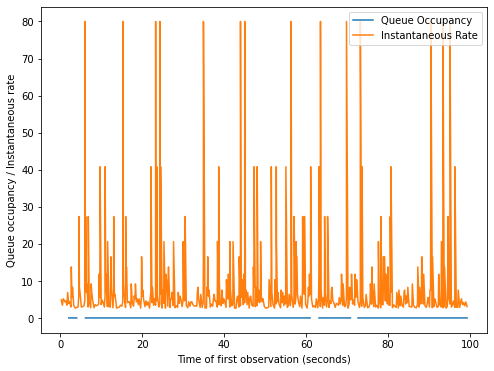

In [6]:
df = pd.read_csv('dataset1.csv')

# Calculate the interarrival time
df['Interarrival Time'] = df['time'].diff()

# Calculate the packet delay
df['Packet Delay'] = df[['AtoB', 'AtoC', 'AtoD']].max(axis=1) - df['AtoB']

# Calculate the queue occupancy
df['Queue Occupancy'] = df['Packet Delay'].rolling(window=10).mean()

# Calculate the instantaneous rate
df['Instantaneous Rate'] = 1 / df['Interarrival Time']

# Calculate the mean rate
mean_rate = df['Instantaneous Rate'].mean()

# Calculate the standard deviation of the rate
std_rate = df['Instantaneous Rate'].std()

# Calculate the buffer size
buffer_size = 2 * std_rate * df['Packet Delay'].max()

# Calculate the delta Q and V components
df['Delta Q'] = df['Queue Occupancy'].diff()
df['Delta V'] = df['Instantaneous Rate'].diff()

# Plot the queue occupancy and instantaneous rate
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['time'], df['Queue Occupancy'], label='Queue Occupancy')
ax.plot(df['time'], df['Instantaneous Rate'], label='Instantaneous Rate')
ax.set_xlabel('Time of first observation (seconds)')
ax.set_ylabel('Queue occupancy / Instantaneous rate')
ax.legend()
plt.show()

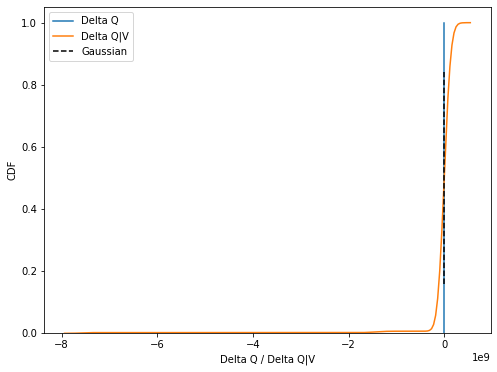

In [7]:
# Plot the CDFs of delta Q and delta Q|V
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(df['Delta Q'].dropna(), cumulative=True, ax=ax, label='Delta Q')
sns.kdeplot(df['Delta Q'].dropna() / df['Delta V'].dropna(), cumulative=True, ax=ax, label='Delta Q|V')
x = np.linspace(-1, 1, num=1000)
y = norm.cdf(x)
ax.plot(x, y, linestyle='dashed', color='black', label='Gaussian')
ax.set_xlabel('Delta Q / Delta Q|V')
ax.set_ylabel('CDF')
ax.legend()
plt.show()